#**Personal Loan Campaign**

<center><img src="https://static.vecteezy.com/system/resources/previews/016/609/768/original/bank-loan-successfully-illustration-concept-on-white-background-vector.jpg" width="720"></center>

<center><font size=6>Personal Loan Prediction</font></center>

## **Problem statement**

**Business Context**:
AllLife Bank is a US bank which has a majority of liablility customers (depositiors). It wants to turn few of these customers into borrowers (asset customers) and maximize their profit by earning interest on these loans.

In the attempt to turn depositors into borrowers last year, the bank has found a healthy conversion rate of 9%, which data we have now.

**Objective**:
The bank wants us to **build a model which predicts a potential customer who has high probability of buying a loan**, which helps the marketing team to devise campaigns with better targeting to increase the success ratio.


## **Data description**

The data contains the different attributes of machines and health. The detailed data dictionary is given below.

**Data Dictionary**

ID: Customer ID

Age: Customer’s age in completed years

Experience: Number of years of professional experience

Income: Annual income of the customer (in thousand dollars)

ZIP Code: Home address ZIP code

Family: The family size of the customer

CCAvg: Average spending on credit cards per month (in thousand dollars)

Education: Education Level — 1: Undergrad; 2: Graduate; 3: Advanced/Professional

Mortgage: Value of house mortgage, if any (in thousand dollars)

Personal_Loan: Did the customer accept the personal loan offered in the last campaign?

Securities_Account: Does the customer have a securities account with the bank?

CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?

Online: Do customers use Internet banking facilities?

CreditCard: Does the customer use a credit card issued by any other bank (excluding All Life Bank)?

## Import necessary libraries

In [189]:
#To load and manipulate data
import pandas as pd
import numpy as np

#To plot
import matplotlib.pyplot as plt
import seaborn as sns

#to split data
from sklearn.model_selection import train_test_split

#To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#To get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

#To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

##**Load the data**

In [100]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
# Read the dataset into  dataframe
df = pd.read_csv('/content/drive/MyDrive/GLAIML/Projects/week2/Loan_Modelling.csv')

In [102]:
#Copy to another variable to avoid changing the original dataset
data = df.copy()

## Primary Understanding of the data

In [103]:
# See how many observations and how many features are present
df.shape

(5000, 14)

#### **Observation**:
There are 5000 observstions with 14 fields each

In [104]:
# Understand the schema of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### **Observation**:


*   There are **13 integer columns and 1 float column**.
*   The ID column which uniquely identifies the customer is also stored as integer.


*   All the 5000 values in **all the columns are non-null**.
*   Many fields like Mortgage, Personal_Loan, Securities account could be stored as binary.





In [105]:
# see first 5 records to understand how the data looks
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [106]:
# see the last 5 records of the dataset
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


#### **Observation** :


*   Each row represents a customer profile


*  `ID` column contains unique values


*   Education is Label encoded, which means : 1 -> Undergraduate, 2 -> Graduate, 3-> Advanced/Professional.


*   While Age, Experience, Income, Family, CCAvg are numerical and continuous,Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online and CreditCard are categorical.
*   **'Personal_Loan' is the target variable.**





In [107]:
# checking for the null values
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


#### **Observation**:
There are no nulls in any column as seen above using the info command.

In [108]:
# Dropping the duplicate values
print(data.duplicated().sum())

0


#### **Observation**:
There are no duplicate values to be handled.

In [109]:
# Drop the columns with unique values
print(data.ID.nunique())

5000


#### **Observation**:
Since the `ID` column contained all uniique vales, it could be dropped since it was categorical and does not add much value to the further analysis.

In [110]:
data = data.drop(["ID"], axis=1)

In [111]:
#Get the statistical 5 number summary of the data
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### **Observation**:
The dataset shows customer ages range from 23 to 67, with an average age of ~45.
There are **negative values in Experience** (minimum = -3), indicating possible data quality issues.
**Income is highly skewed**, with a large gap between mean (73.77) and max (224), **suggesting outliers**.
Most customers do not have a personal loan (mean = 0.096), and binary features are imbalanced.

## **Exploratory Data Analysis**

The below functions are required to plot graphs for EDA

In [112]:
def histogram_barplot(data, feature, figsize=(15, 15), kde=False, bins=None):
    """
    Plots Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="navy blue"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [113]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [114]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

In [115]:
### Numerical columns

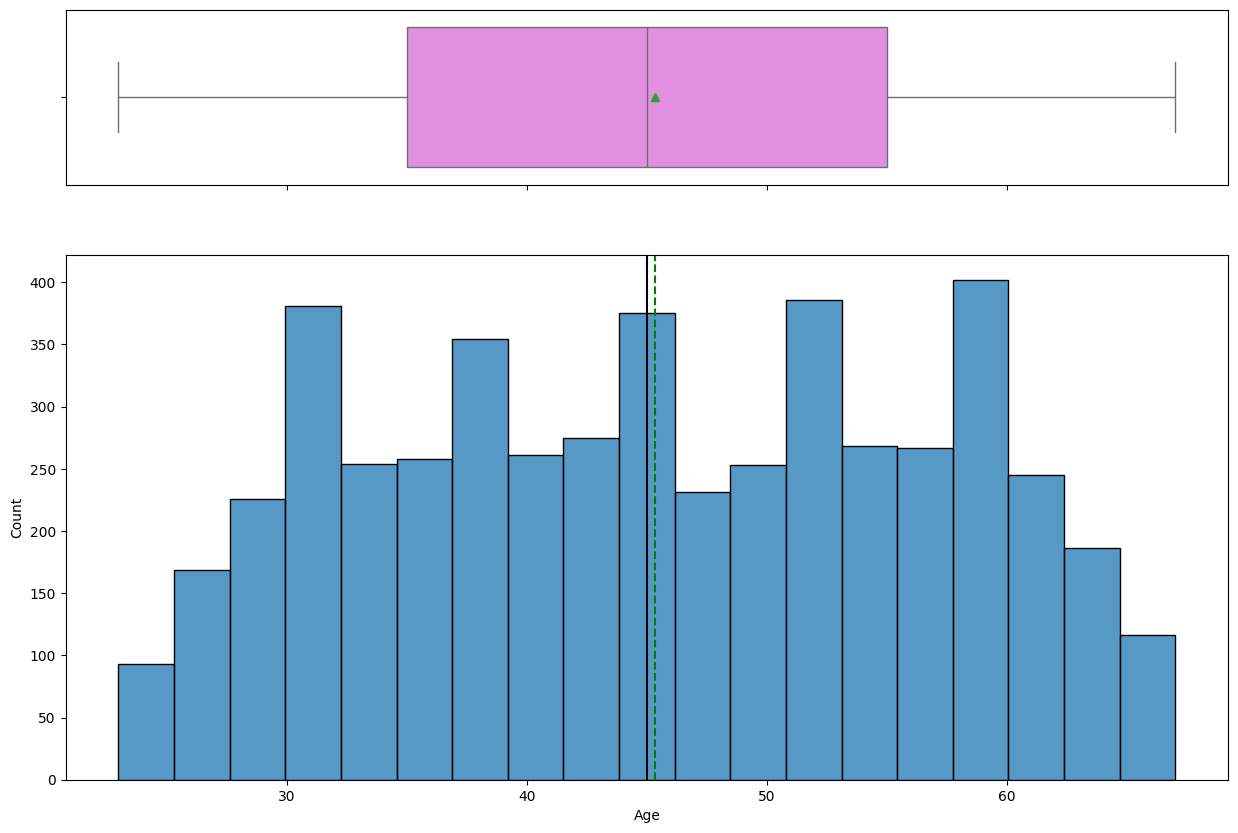

In [116]:
# 1. Age
histogram_boxplot(data, "Age")

#### **Observation**:
1. **Age Range & Central Tendency**: The ages range from ~23 to ~67 years, with a median around 45 and the mean (dotted line) also close by, indicating a fairly symmetric distribution.

2. **Distribution Shape**: The histogram shows a relatively uniform spread with slight central bulging, meaning customers are fairly evenly distributed across all working age groups.

3. **Outliers**: The boxplot does not show any extreme outliers, and the whiskers cover the entire age span smoothly, suggesting age data is clean.

4. **Business Insight**: The bank’s customer base consists mainly of middle-aged individuals, a key demographic for financial products like loans and mortgages.

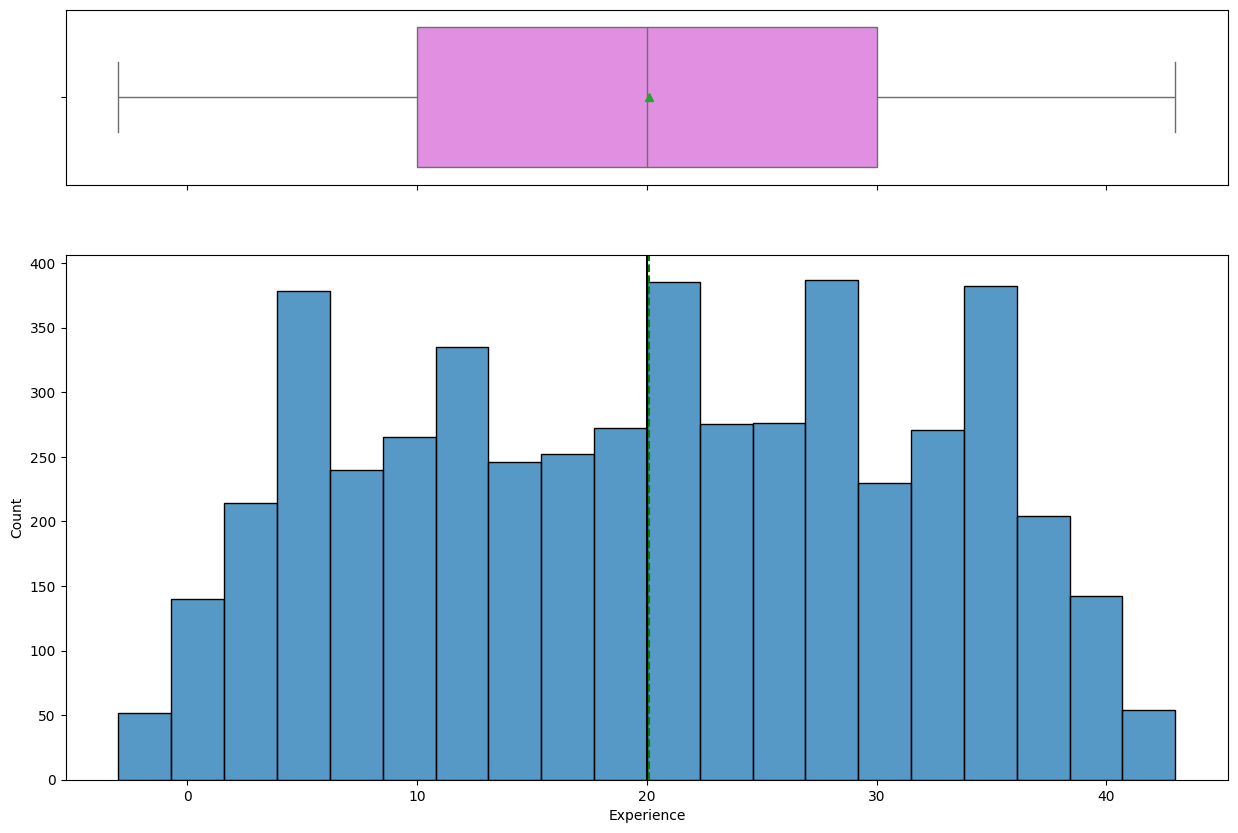

In [117]:
# 2. Experience
histogram_boxplot(data, "Experience")

#### **Observation**:
1. **Range & Central Tendency**: Experience ranges from below 0 to 43 years. The median is around 20 years, and the mean is similar, suggesting a balanced distribution.

2. **Data Quality Issue**: The presence of negative experience values (visible in the histogram and boxplot) indicates invalid or erroneous data that should be cleaned.

3. **Distribution Shape**: The histogram is fairly uniform with no extreme skewness, suggesting a diverse set of customer experience levels.

4. **Outliers**: Apart from the negatives, there are no strong outliers beyond the whiskers, and most data lies within the interquartile range.

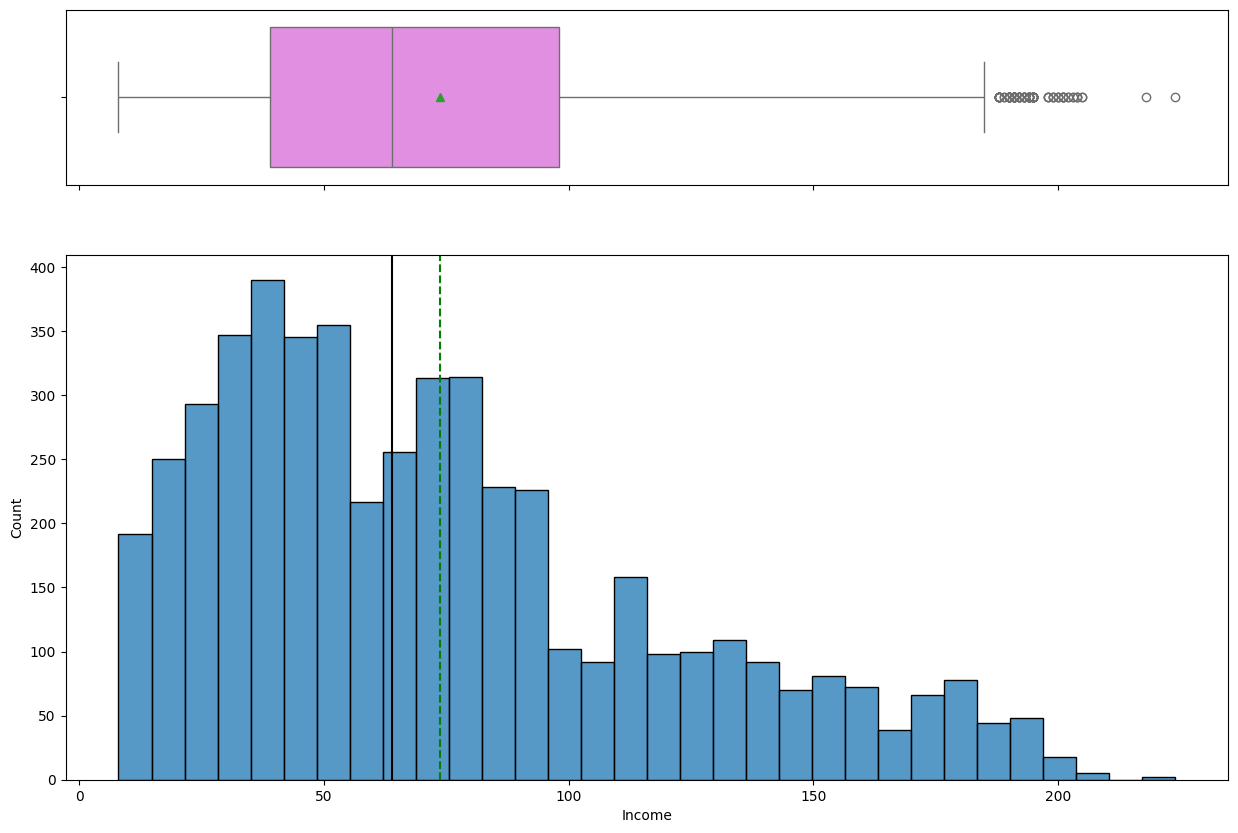

In [118]:
# 3. Income
histogram_boxplot(data, "Income")

#### **Observation**:
1. **Skewed Distribution**: The income distribution is right-skewed — most customers earn below 100K, but a small number earn much more, pushing the mean higher than the median.

2. **Outliers Present**: The boxplot reveals several outliers beyond the upper whisker, with some income values going above 200K (in thousand dollars), which may require treatment or capping.

3. **Central Tendency**: The median income is around 64K, while the mean is around 73K, confirming the presence of high-income individuals skewing the average.

4. **Business Insight**: Most bank customers are in the mid-to-lower income bracket, which could influence their eligibility or interest in personal loan products.

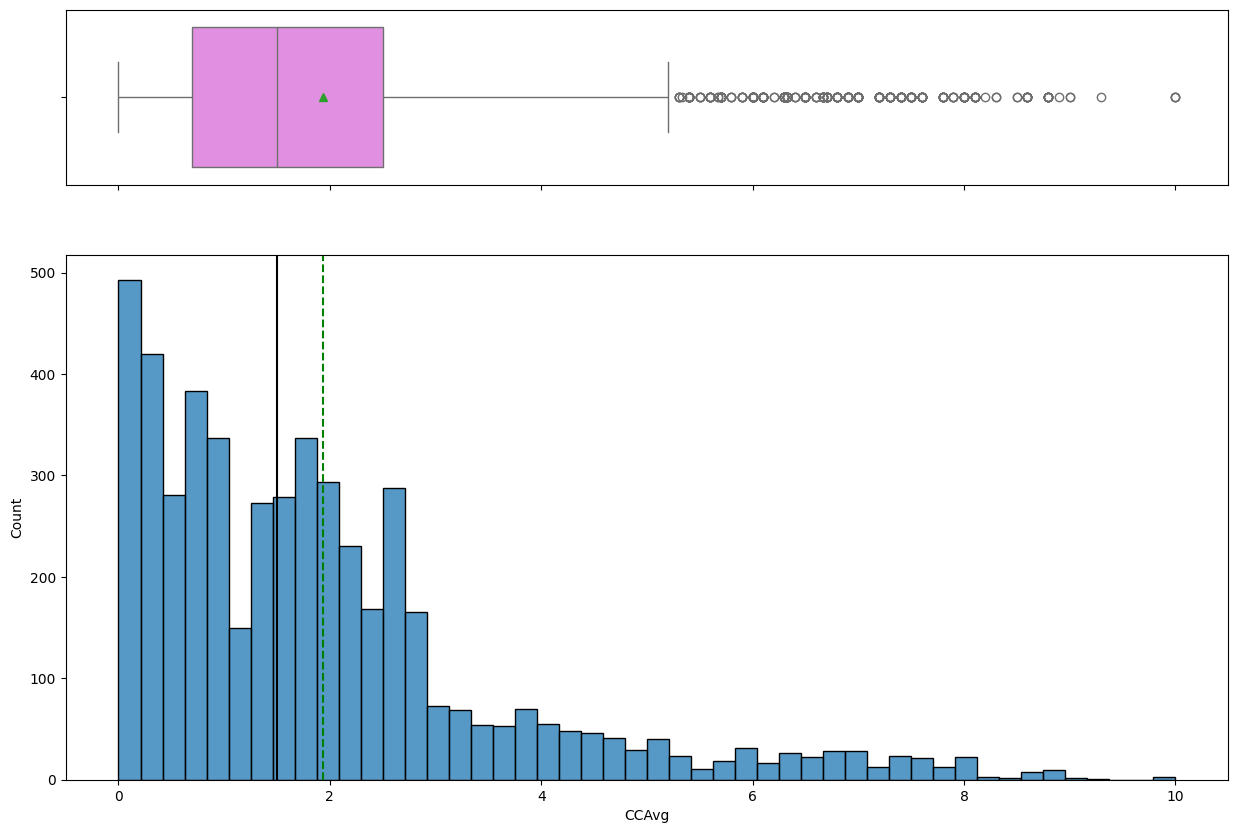

In [119]:
# 4. CCAvg
histogram_boxplot(data, "CCAvg")

#### **Observatiom**:
1. **Highly Right-Skewed**: The distribution is heavily right-skewed, with most customers spending less than $3,000 per month on credit cards.

2. **Outliers**: The boxplot shows a large number of outliers beyond the upper whisker, with spending reaching up to $10,000/month — these extreme values may affect modeling and need attention.

3. **Central Tendency**: The median is around \$1,500\/month, while the mean is slightly higher (~$1,938), again suggesting some customers with unusually high spending.

4. **Customer Insight**: A significant portion of customers are low-to-moderate credit card users, which could indicate cautious spending behavior or limited credit usage.

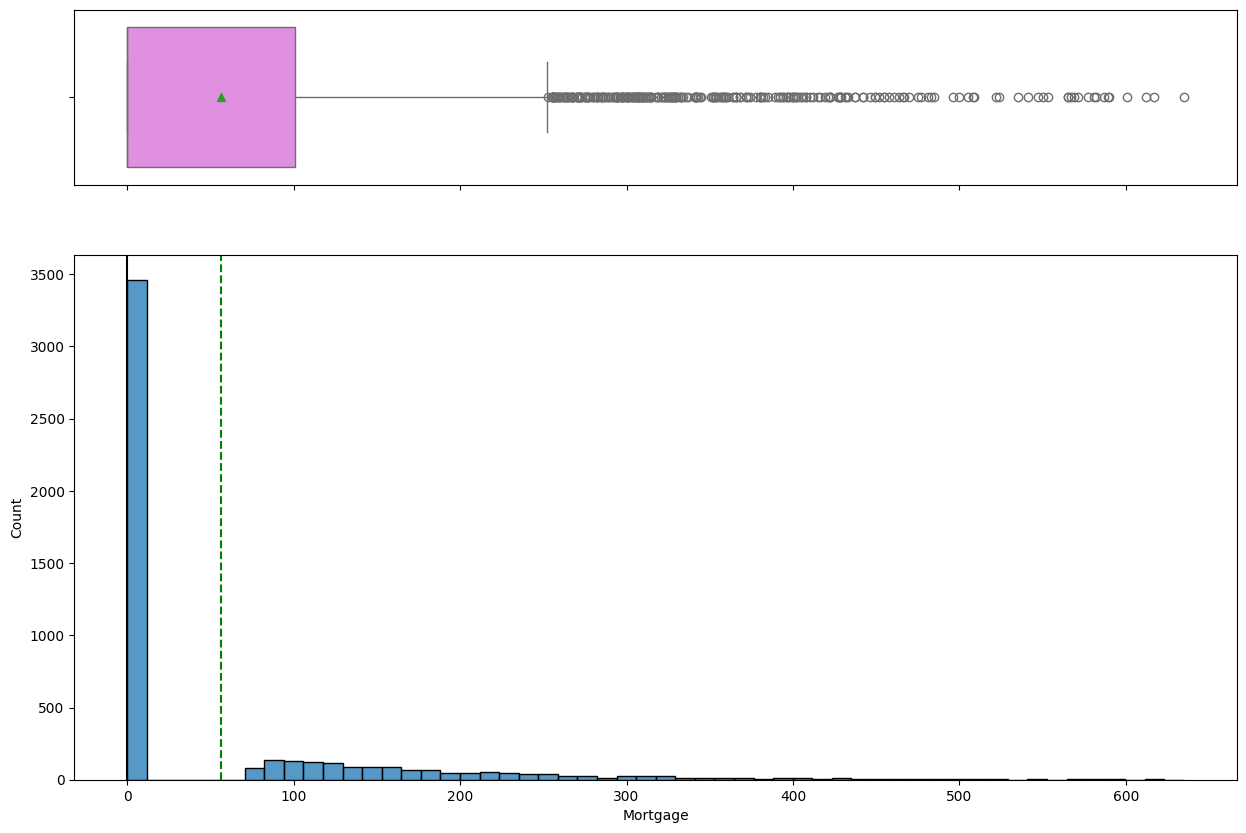

In [120]:
# 4. Mortgage
histogram_boxplot(data, 'Mortgage')

#### **Observation**:
1. **Highly Right-Skewed**: The distribution is strongly right-skewed, with a vast majority of customers having a mortgage value close to zero.

2. **Outliers**: The boxplot shows many extreme outliers, with mortgage amounts going well beyond 600K — these values may distort statistical models.

3. **Central Tendency**: While the mean is ~56K, the median is 0, indicating that more than half of the customers do not have a mortgage.

4. **Business Insight**: The presence of a large non-mortgage-holding segment might suggest renters or customers with fully paid properties, which can influence loan approval strategies.

In [121]:
### Categorical columns

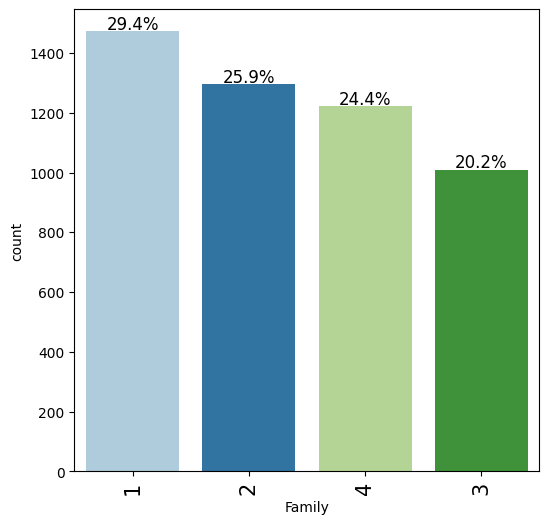

In [122]:
# 1. Family
labeled_barplot(data, "Family", perc=True)

#### **Observation**:
**Most Common Size**: The most frequent family size is 1, representing 29.4% of customers — nearly one-third are likely single or living alone.

**Balanced Distribution**: The remaining family sizes (2, 3, and 4) are also fairly distributed, with 2-person families at ~26%, 4-person at ~24%, and 3-person at ~20%.

**Potential Insight**: A large portion of customers have smaller families, which may indicate fewer financial dependents and influence loan eligibility or spending behavior.

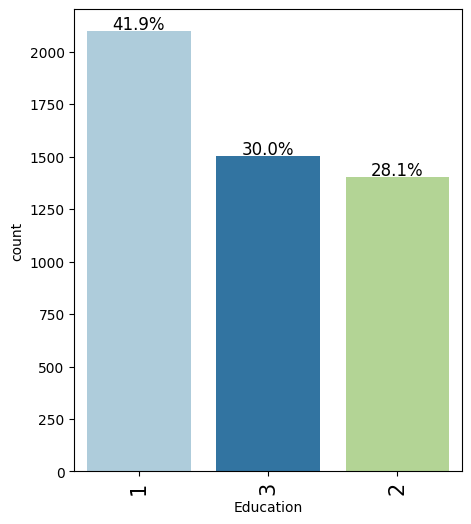

In [123]:
# 2. Education
labeled_barplot(data, "Education", perc=True)

#### **Observation**:
1. **Undergraduates Dominate**: A significant portion of the customer base — 41.9% — comprises undergraduates, indicating the bank is serving a largely entry-to-mid level educated population.

2. **Skilled Customer Base**: A combined 58.1% of customers are either graduates (28.1%) or advanced/professionals (30%), which reflects a strong presence of highly educated individuals likely in stable or senior roles.

3. **Product Positioning Insight**: With a sizeable percentage of advanced professionals, the bank could design premium offerings or investment products tailored for this segment.

4. **Segmentation Potential**: Education level is a powerful variable for segmentation — possibly correlating with income, credit usage, and loan acceptance behavior.

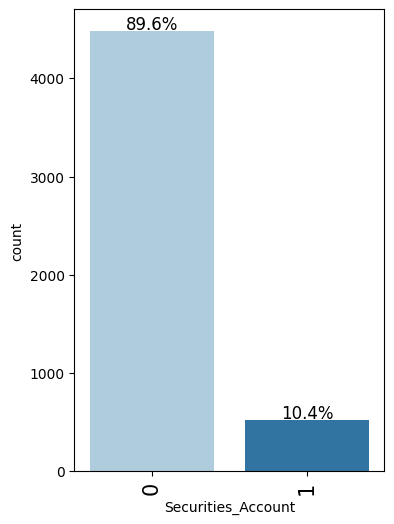

In [124]:
# 3.Securities_account
labeled_barplot(data, "Securities_Account", perc=True)

#### **Observation**:
1. A large majority of the customers do not have a security account. This feature is highly imbalanced.
2. This variable might help distinguish a specific customer segment.

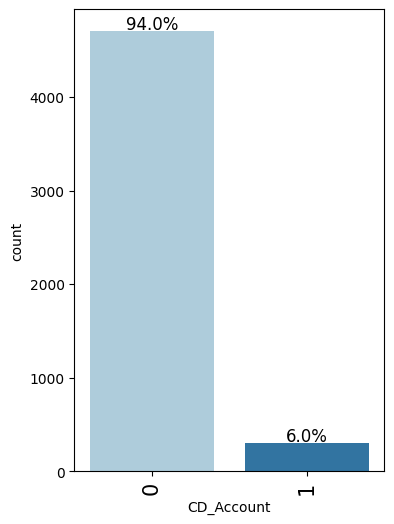

In [125]:
# 4. CD_Account
labeled_barplot(data, "CD_Account", perc=True)

#### **Observation**:
1. Even this feature is highly imbalanced since only 6% of the customer base hold a CD account.
2. This feature could help the model differentiate between regular customers and more financially invested or long-tern savers.

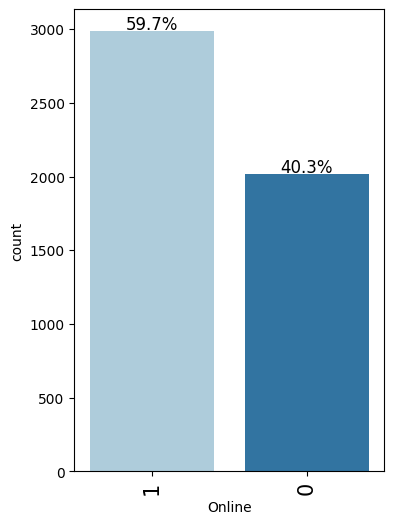

In [126]:
# 5. Online
labeled_barplot(data, "Online", perc=True)

#### **Observation**:
1. Unlike the other features above, this feature is more evenly distributed.
2. Nearly 60% of customers use online banking, while 40% still prefer traditional channels. This highlights a significant chunk of customers that may benefit from digital onboarding or service improvements.

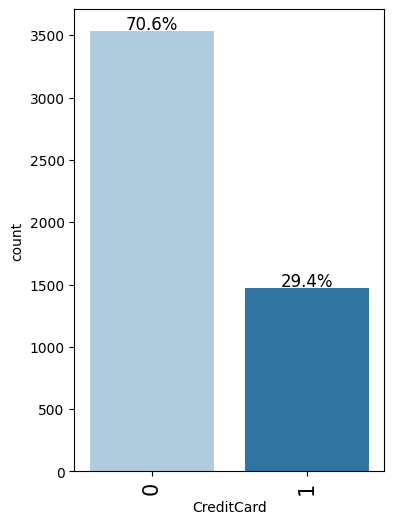

In [127]:
# 6.CreditCard
labeled_barplot(data, "CreditCard", perc=True)

#### **Observation**:
Behavior indicator: This feature could signal a more engaged or credit-active customer base.
A significant majority of customers do not own a credit card. However, the proportion of the credit card holders is still substanial enough to capture meaningful behavior patterns.

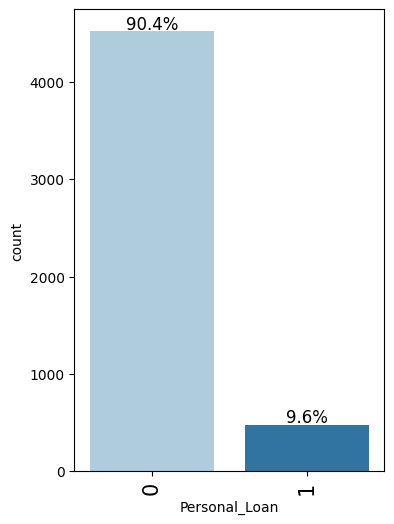

In [128]:
# 7. Personal_Loan
labeled_barplot(data, "Personal_Loan", perc=True)

#### **Observation**:
The target variable Personal_Loan is highly imbalanced, with only 9.6% of customers accepting the personal loan offer. This indicates a rare event classification scenario. Special care must be taken to evaluate model performance using appropriate metrics and techniques that address class imbalance, relying on accuracy alone.

### **Bivariate analysis**

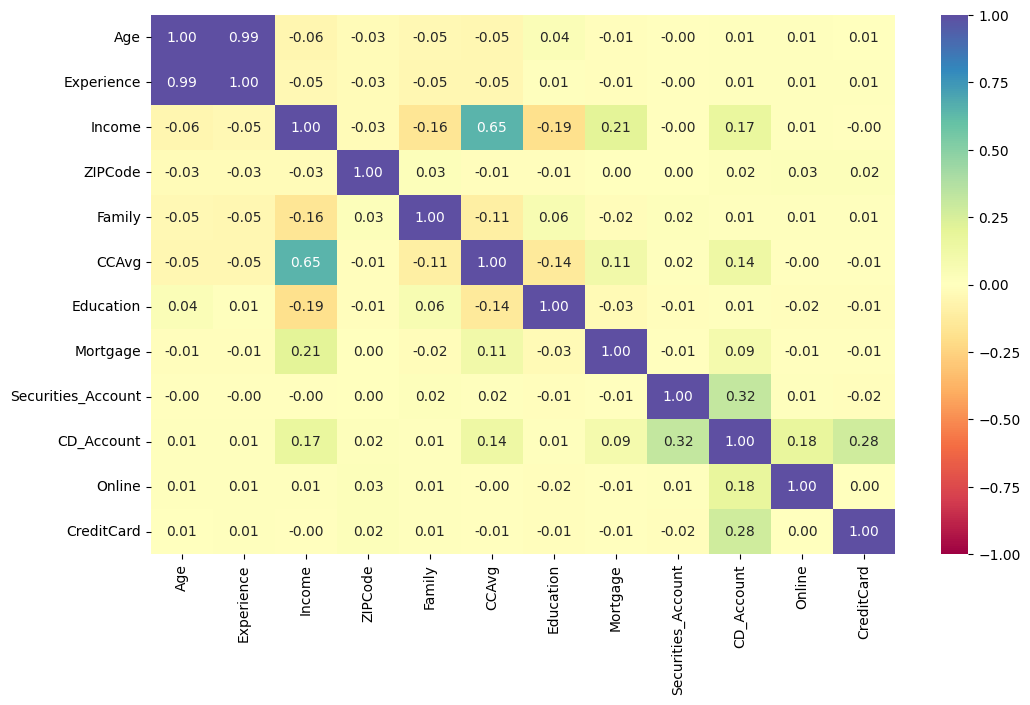

In [129]:
#Plot the heatmap to find the correlation between different variables
cols_list = data.columns.tolist() #Convert the columns into a list
cols_list.remove('Personal_Loan') #Remove the target variable since we examine it with each other variable seperately

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### **Observations**:
1. **Age and Experience**:

Correlation = 0.99, indicating a strong linear relationship. As expected, older customers tend to have more professional experience.

This could cause multicollinearity, so better dropping one during modeling.

2. **Income and CCAvg**:

Correlation = 0.65, showing that higher earners tend to spend more on credit cards. This is a logical and useful financial pattern.

3. **Mortgage and Income**:

Correlation = 0.21, weakly positive — people with higher income are slightly more likely to have mortgages, but not strongly so.

4. **Account Relationships**:

Securities_Account, CD_Account, and CreditCard show positive correlation among each other (up to ~0.32), indicating that customers holding one financial product often hold others.

5. **Low Correlation Elsewhere**:

Most features have very low or negligible correlation (near zero), which implies low multicollinearity, making them potentially valuable individual predictors.

6. **ZIP Code**:

Almost no correlation with any feature, indicating it may be uninformative or just a customer ID-like field.

Lets evaluate the relationship between the target variable and other categorical values.

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


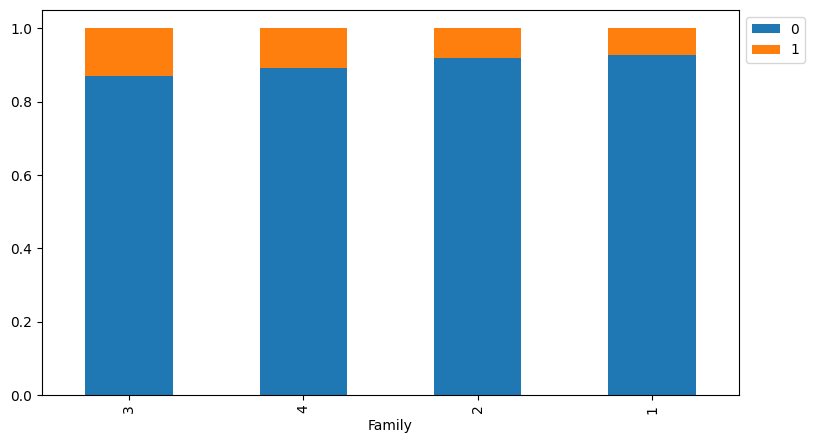

In [130]:
# 1. Family
stacked_barplot(data, "Family", "Personal_Loan")

#### **Observation**:
1. **Lower Acceptance Overall**: Across all family sizes, the majority of customers did not accept the personal loan offer (blue portion dominates).

2. **Slight Uptick in Larger Families**: Families with size 3 and 4 show a slightly higher proportion of loan acceptance (orange) compared to size 1 and 2, though the difference is marginal.

3. **Possible Reasoning**: Larger families may have more financial responsibilities, making them more likely to accept a personal loan for education, home needs.

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


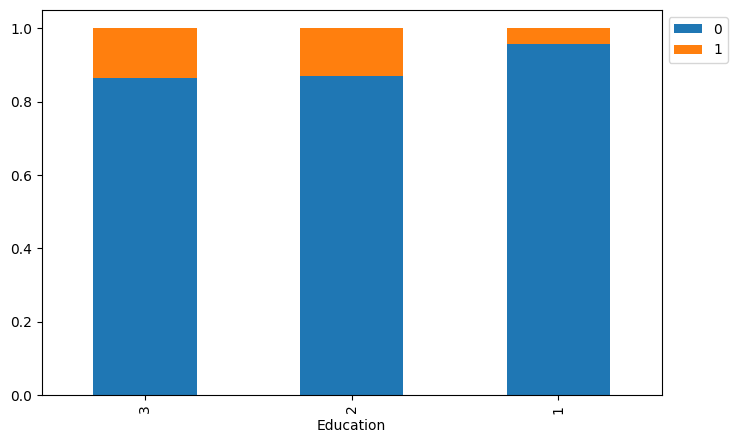

In [131]:
# 2. Education
stacked_barplot(data, "Education", "Personal_Loan")

### **Observation**:
Even though the loan acceptance ratio looks dismal even in this feature, it can be seen that higher the education, higher is the probability to buy loan possibly due to capacity to pay back.

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


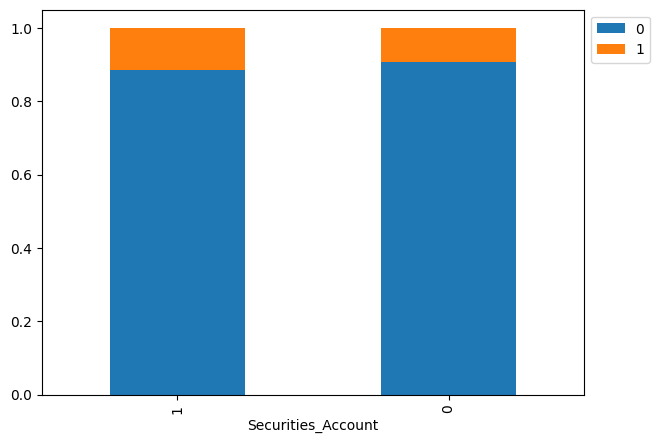

In [132]:
# 3. Security account and CD account
stacked_barplot(data, "Securities_Account", "Personal_Loan")

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


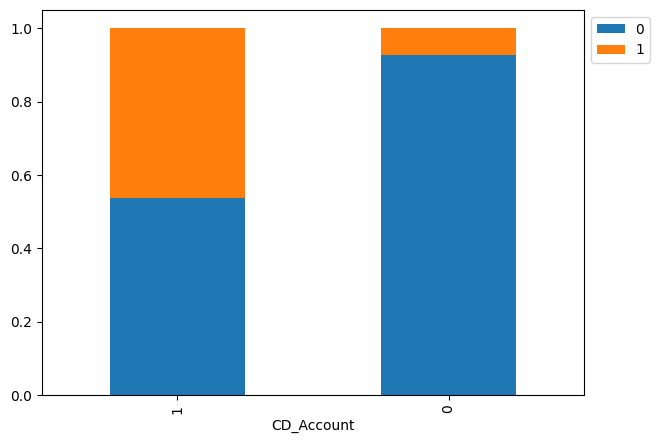

In [133]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

#### **Observation**:
1. The security account does not show any pattern. But CD account holders have a higher tendency to buy loans. The CD_account holders form a strong category to target campaigns.

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


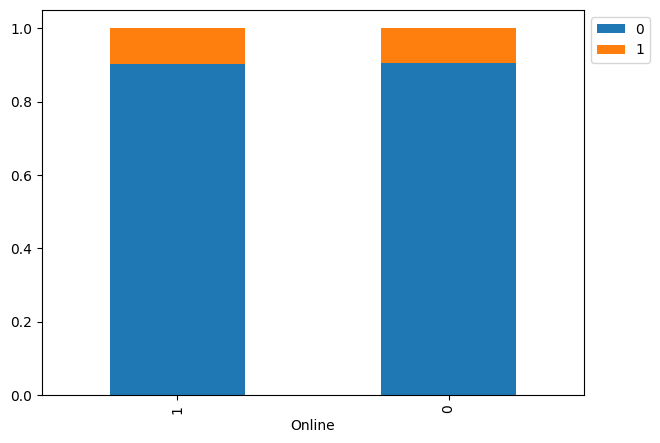

In [134]:
# 4. Online
stacked_barplot(data, "Online", "Personal_Loan")

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


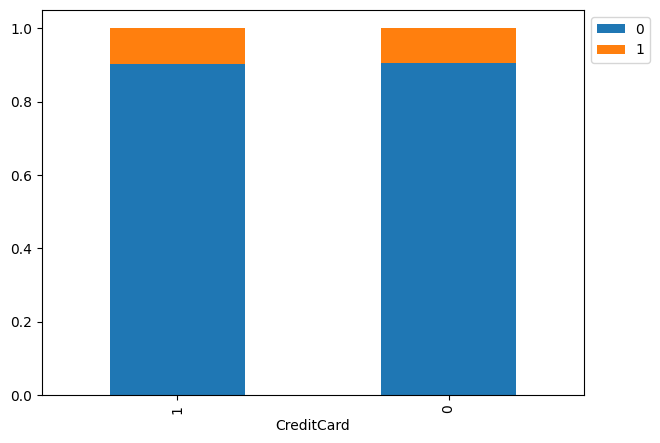

In [135]:
# 5. Credit card
stacked_barplot(data, "CreditCard", "Personal_Loan")

#### **Observation**:
1. Customers who bank online and credit card holders are indifferent to buy personal loan.

Lets analyse the relationship between the target variable and other continuous values

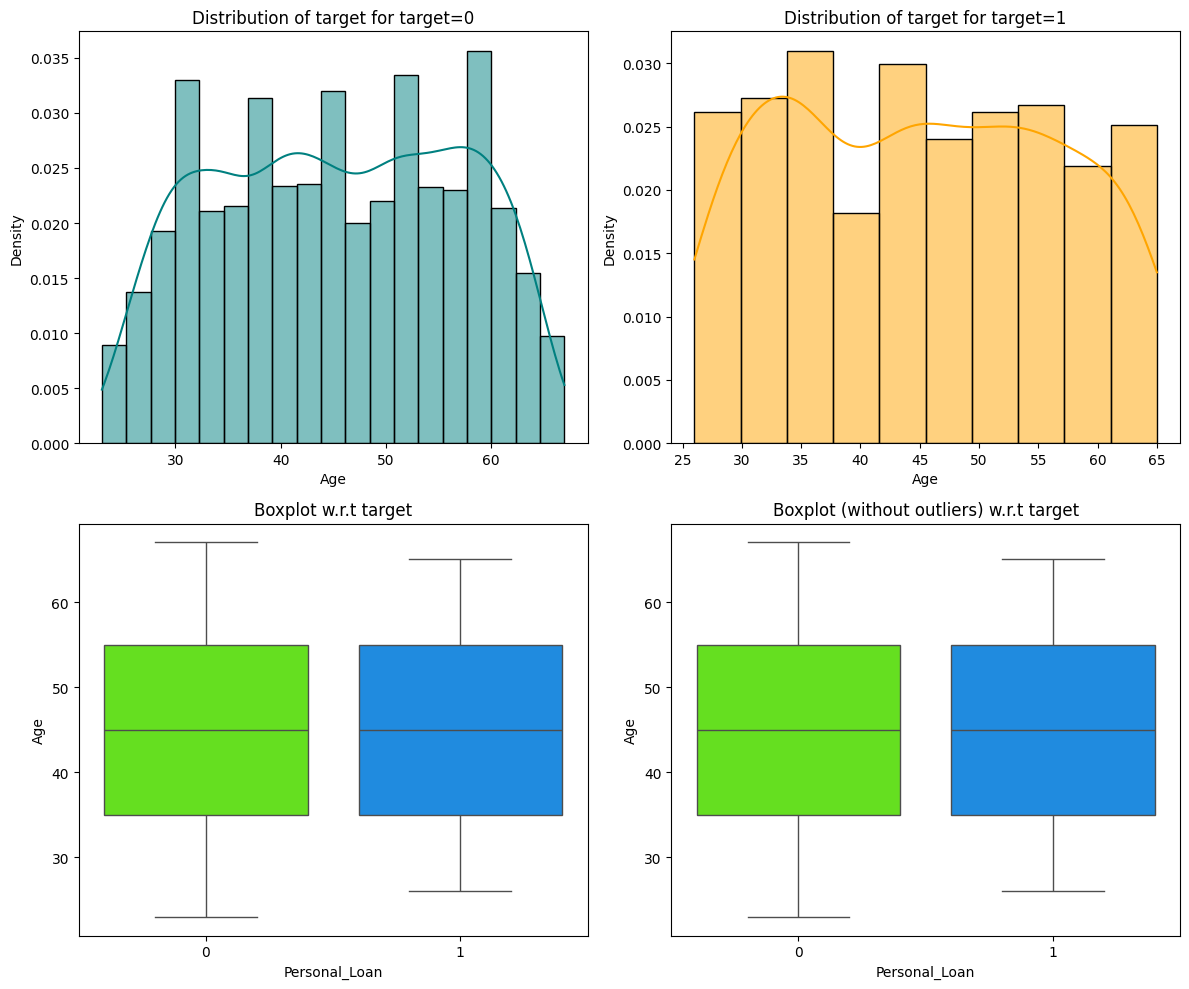

In [136]:
# 1. Age vs Persoanl_Loan
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

#### **Observation**:
1. Similar Age Ranges: Both groups (loan accepted and not accepted) cover a similar age span (~25 to 65), indicating that age alone may not drastically differentiate the two segments.

2. Slight Age Shift in Acceptance: The density plot for target = 1 (loan accepted) shows a mild concentration in the 30–50 age range, suggesting this group may be slightly more inclined to take loans compared to others.

3. Boxplot Comparison: Median age is similar for both groups, but loan acceptors (target = 1) appear to have a slightly narrower IQR (interquartile range), indicating more consistency in age among those accepting loans.

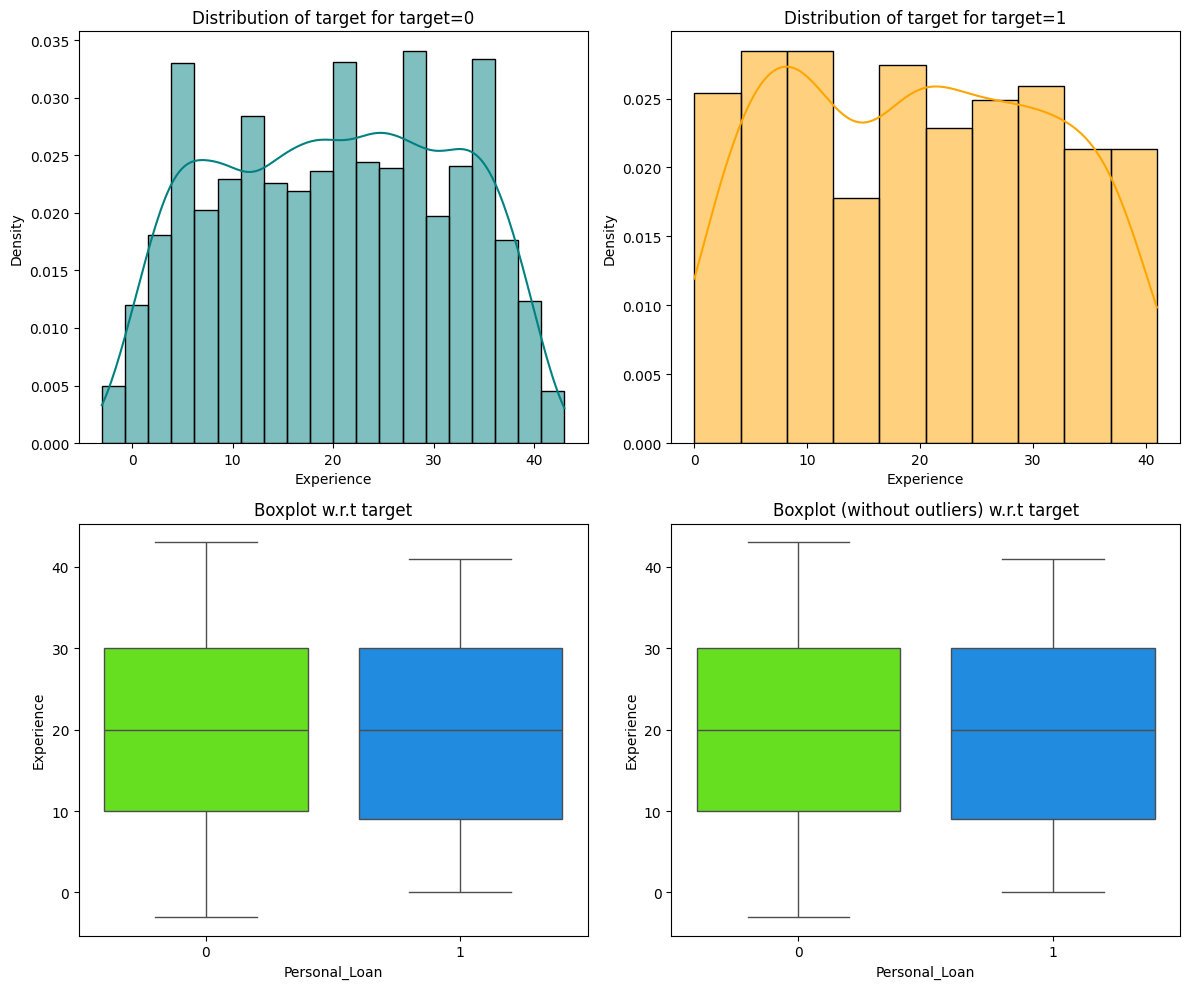

In [137]:
# 2. Experience vs Personal loan
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

#### **Observation**:
1. Slight Shift in Density: For target = 1, the histogram is slightly denser in the 10–30 years range, indicating people with moderate experience are a bit more likely to accept personal loans.

2. Boxplot Insights: Median experience is roughly equal for both groups (~20 years), and the interquartile ranges (IQR) are also very close, showing no dramatic difference between loan takers and non-takers.

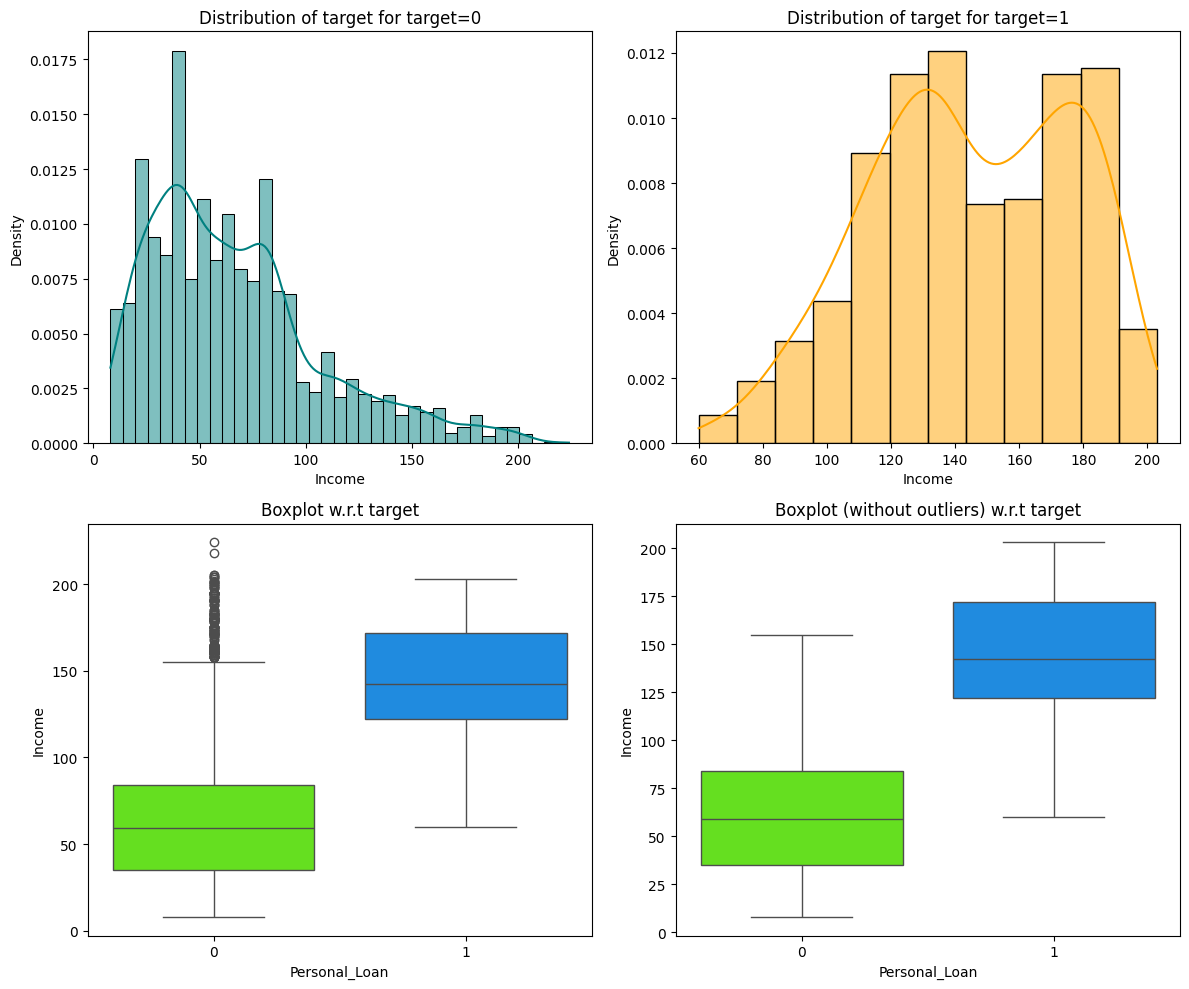

In [138]:
# 3. income vs Personal_Loan
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

#### **Observations**:
1. **Clear Positive Relationship**: Customers who accepted personal loans (target = 1) tend to have significantly higher incomes than those who didn’t. Their income distribution is centered between 120k–180k, while non-acceptors mostly fall between 30k–80k.

2. **Distinct Separation in Boxplots**: The median income for loan takers is much higher, and the interquartile range (IQR) does not overlap with that of non-takers—indicating income is a strong predictor for personal loan acceptance.

3. **Right Skew for Non-Acceptors**: Income distribution for target = 0 is right-skewed, with many customers having lower incomes and fewer high-income individuals.

4. **Minimal Overlap After Removing Outliers**: Even without outliers, the separation between the two target groups is very prominent, reinforcing the **importance of income as a driver of loan decision**s.



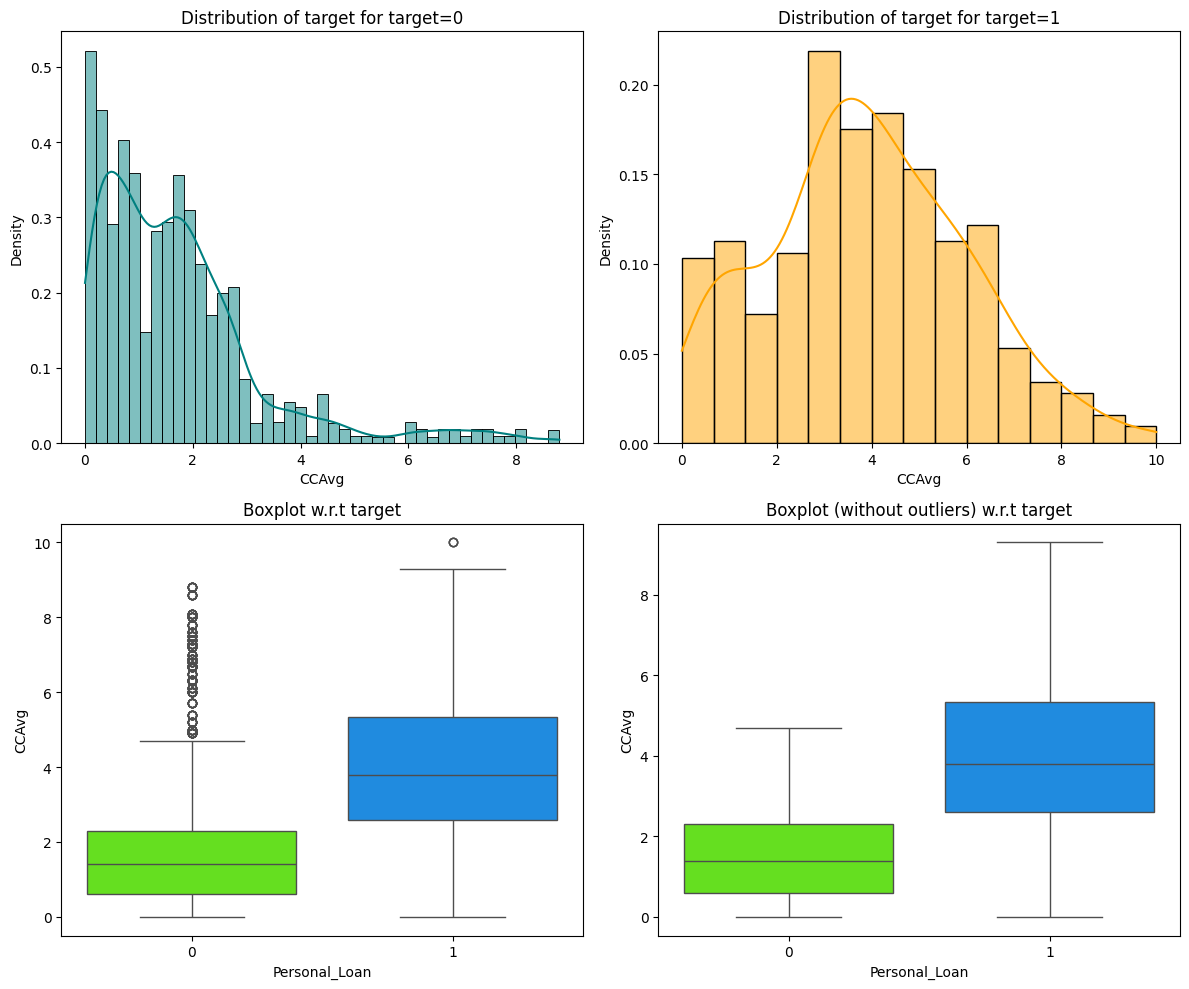

In [139]:
# 4. CCAvg versus Personal_Loan
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

#### **Observation**:
1. Higher Spending Linked to Loan Acceptance:

* Customers who accepted personal loans (target = 1) have significantly higher credit card spend.

* Their CCAvg mostly ranges between 2.5k–6.5k, with a few spending close to 10k.

* In contrast, non-loan customers (target = 0) spend less, primarily below 2.5k.

2. Boxplot Confirms Strong Separation:

* The median of target = 1 group is well above that of target = 0.

* The interquartile ranges show minimal overlap, indicating strong predictive power of CCAvg.

* Even after removing outliers, the gap between the two groups persists clearly.

3. Distribution Shapes:

* For non-loan takers, CCAvg is right-skewed with a sharp drop after 2k.

* For loan takers, the distribution is more symmetrical and centered around mid-spending ranges.

4. Outliers Present but Controlled:

* There are a few high spenders among non-loan takers, but their count is small and does not affect the overall trend.

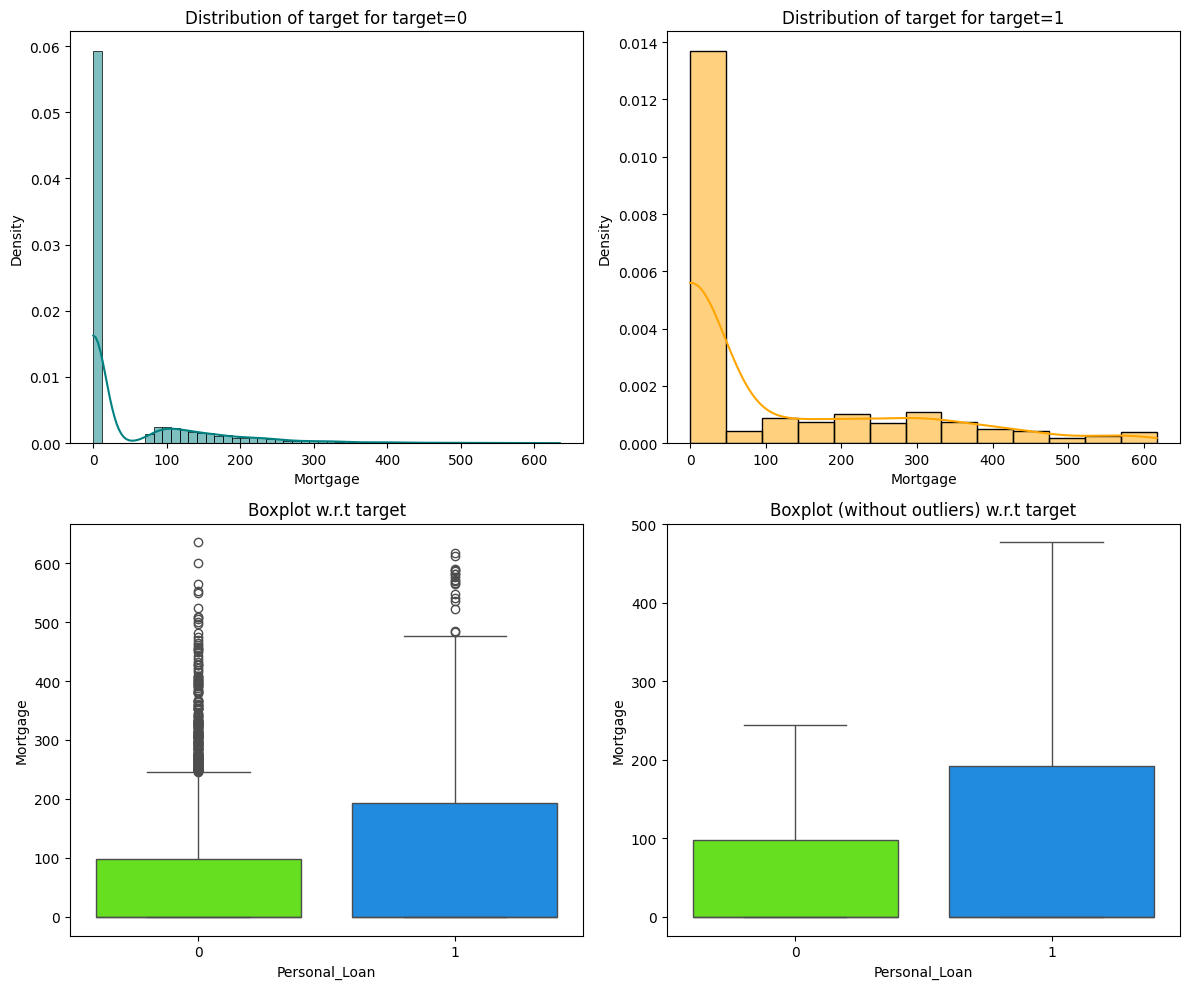

In [140]:
# 5. Mortgage vs Personal_Loan
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan")

#### **Observation**:
Mortgage is a useful but moderately strong predictor of personal loan acceptance. While not as sharply separated as CCAvg, it does show that loan-takers tend to have higher mortgage liabilities.

## **Data preprocessing**

1. Drop 'ZIPCode' since it is non correlational to any feature and is unique

In [141]:
data = data.drop(['ZIPCode'], axis=1)

2. Drop the 'Age' column since it is highly correlated with 'Experience' and may cause multicollinearity

In [142]:
data = data.drop(['Age'], axis = 1)

3. Outlier detection

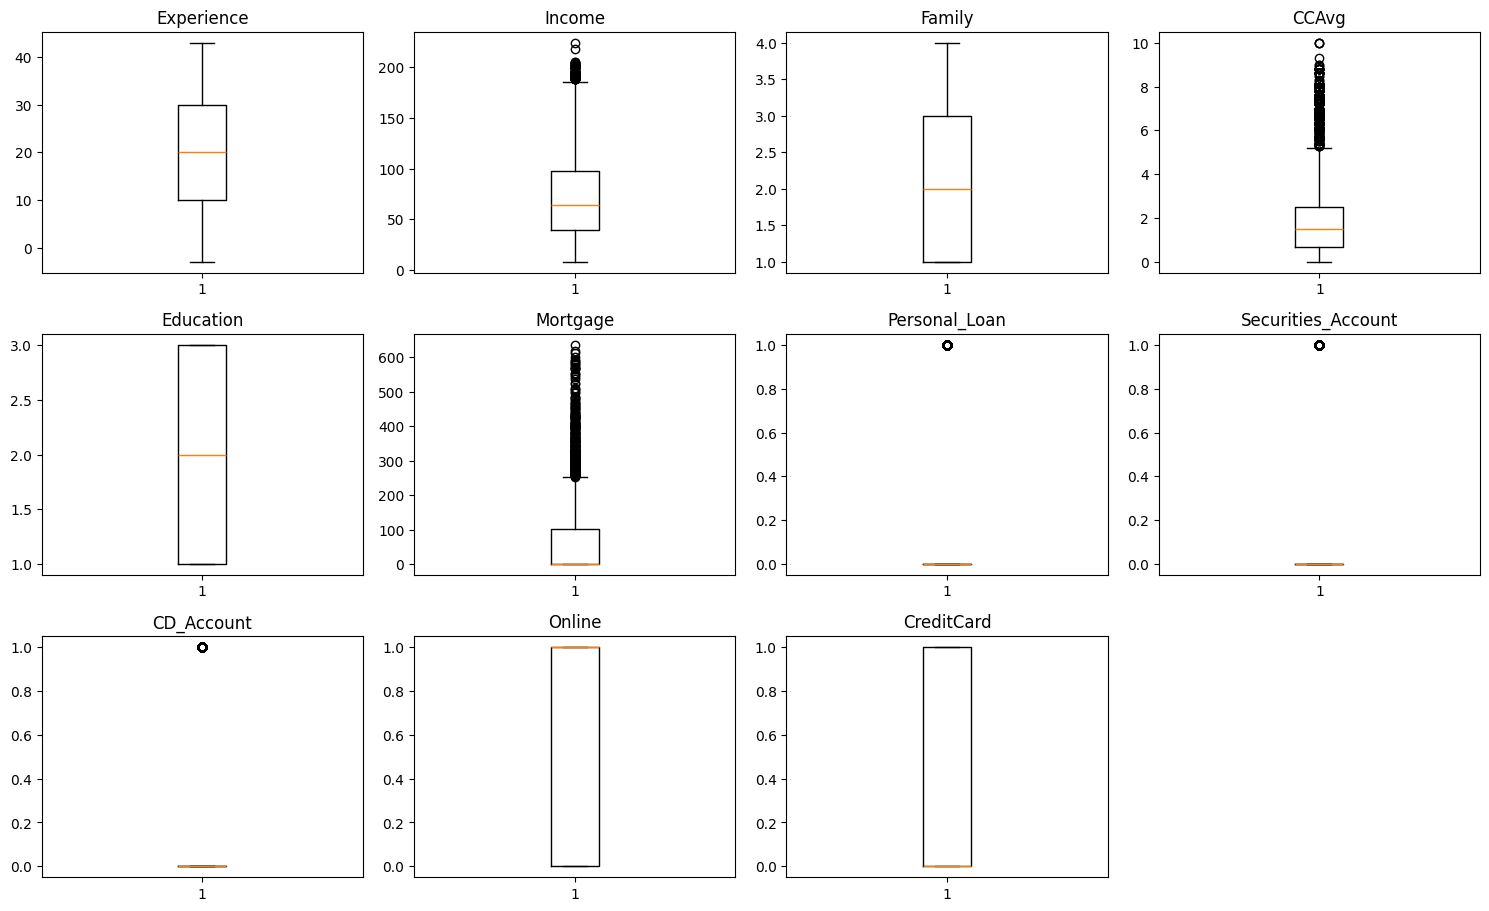

In [143]:
# outlier detection using boxplot
numeric_columns = data.columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Treat the negative values of experience with mean

In [144]:
mean_exp = data['Experience'].mean()
data['Experience'] = data['Experience'].apply(lambda x: mean_exp if x < 0 else x)

In [145]:
#Validating the range of values in Experience
data['Experience'].describe()

,Experience
count,5000.000000
mean,20.328688
std,11.253009
min,0.000000
25%,11.000000
50%,20.104600
75%,30.000000
max,43.000000


#### **Observation**:
Negative values are removed.

Even though outliers are present in other features, they ook possible. So lets keep them.

## Data preparation for modelling

In [146]:
# Bifurcate the features and the target variable
X = data.drop(["Personal_Loan"], axis=1)
Y = data["Personal_Loan"]

# Convert categorical variables into one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Convert the resultant values into float
X = X.astype(float)

# Splitting data in train and test sets with 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [147]:
# Validate the test and train datasets
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 10)
Shape of test set :  (1500, 10)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


#### **Observation**:
* Balanced split – The class distribution in training and test sets is very similar, which means stratified sampling was likely used — good for avoiding data leakage or skewed model evaluation.
* In the context it was given that the success rate of the previous campaign was 9.6%, which the train and test samples nearly represent. So We can say the test and train datasets are perfectly split.


## **Model building**

### Model Evaluation criteria

**Model can make wrong predictions as:**
- Predicting a customer will not buy the loan but in reality, the customer will buy. (FN)
- Predicting a mcustomer will buy a loan but in reality, the customer will not buy (FP)

**Which case is more important?**

- If we predict that a customer will not buy but in reality, the customer opts for a loan, then it's a missed opportunity for the bank.
- If we predict that a customer will buy but in reality, the customer does not buy, then there is a wasted effort for marketing to that customer.
- The missed opportunity cost is more than the effort wasted on converting a non-willing customer.

**How to reduce the losses?**

The bank would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

In [148]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [149]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree (default)

In [150]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [151]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


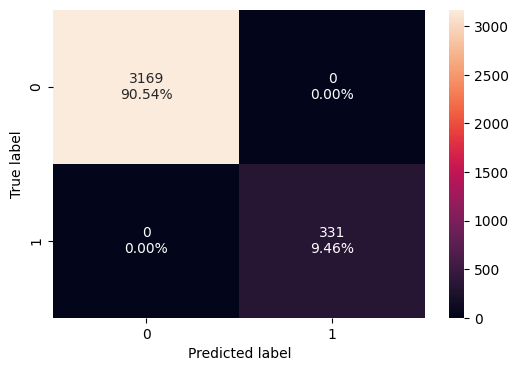

In [152]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [153]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.899329,0.899329,0.899329


#### **Observations**:
Accuracy: 0.98 (98%)

This high accuracy is misleading due to class imbalance — since only 9% of customers actually buy a loan, a model can achieve high accuracy by mostly predicting the negative class.

Recall: 0.899

The model captures ~90% of actual buyers, which is excellent given the imbalance. High recall is especially important when missing actual buyers is costly.

Precision: 0.899

Of all customers the model predicted as likely to buy a loan, ~90% actually did. This indicates very few false positives, making the model actionable for targeted marketing.

F1 Score: 0.899

The F1 score balances precision and recall, and a value of ~0.899 is strong for such an imbalanced problem, suggesting the model handles both false positives and false negatives well.

### Decision Tree (with class_weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [154]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

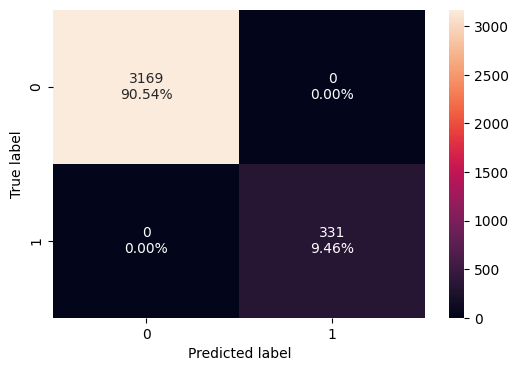

In [155]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [156]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

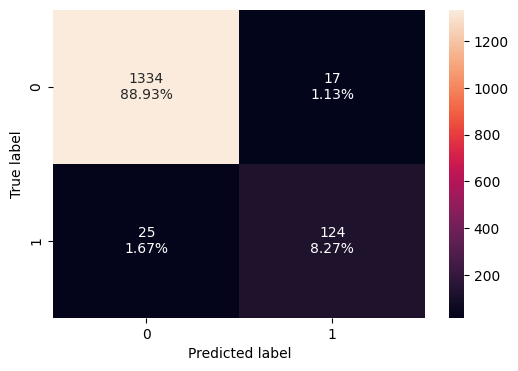

In [157]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [158]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.972,0.832215,0.879433,0.855172


#### **Observation**:
* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

**Let's use pruning techniques to try and reduce overfitting.**

### Decision Tree (Pre-pruning)

* Hyperparameter tuning is crucial because it directly affects the performance of a model.
* Unlike model parameters which are learned during training, hyperparameters need to be set before training.
* Effective hyperparameter tuning helps in improving the performance and robustness of the model.
* The below custom loop for hyperparameter tuning iterates over predefined parameter values to identify the best model based on the metric of choice (recall score).

In [159]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [160]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

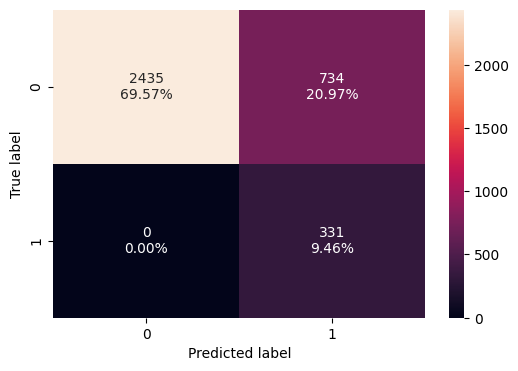

In [161]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [162]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


In [163]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be 1 which shows that the model is able to generalize well on unseen data.

In [164]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

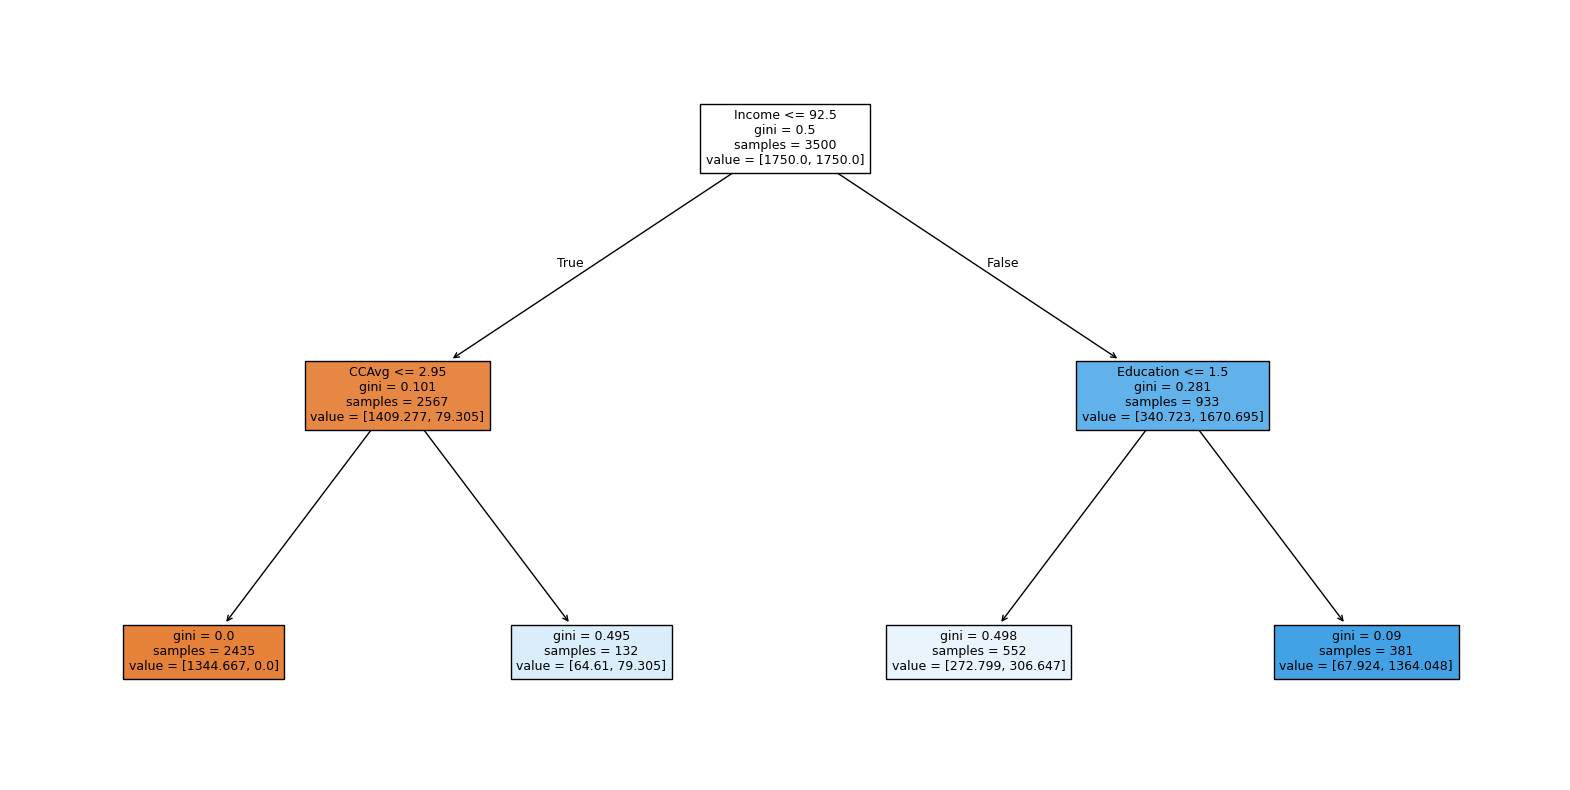

In [165]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [166]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- weights: [272.80, 306.65] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [67.92, 1364.05] class: 1



#### **Observation**:
The first split is on Income, indicating income is the most important feature.

Customers with lower income (≤ 92.5) are further split by CCAvg (Credit Card Average spending).

Customers with higher income (> 92.5) are split based on Education.

In [167]:
importances = model2.feature_importances_
importances

array([0.        , 0.82007181, 0.        , 0.06262835, 0.11729984,
       0.        , 0.        , 0.        , 0.        , 0.        ])

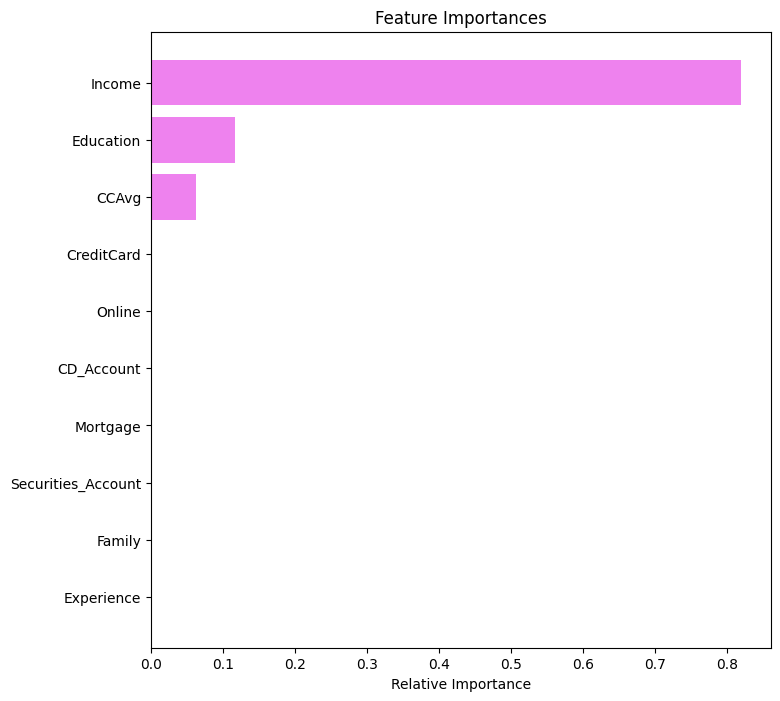

In [168]:
# importance of features in the tree building

importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### **Observation**:
* In the prepruned decision tree the most important features are income, education and CCAvg.

### Decision Tree (Post pruning)

- Cost complexity pruning provides another option to control the size of a tree.
- In `DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``.
- Greater values of ``ccp_alpha`` increase the number of nodes pruned.
- Here we only show the effect of ``ccp_alpha`` on regularizing the trees and how to choose the optimal ``ccp_alpha`` value.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [169]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [170]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-8.280282e-15
1,3.853725e-19,-8.279896e-15
2,3.853725e-19,-8.279511e-15
3,3.853725e-19,-8.279126e-15
4,5.255079e-19,-8.278600e-15
5,5.255079e-19,-8.278075e-15
6,7.707449e-19,-8.277304e-15
7,1.051016e-18,-8.276253e-15
8,8.338059e-18,-8.267915e-15
9,1.257806e-17,-8.255337e-15


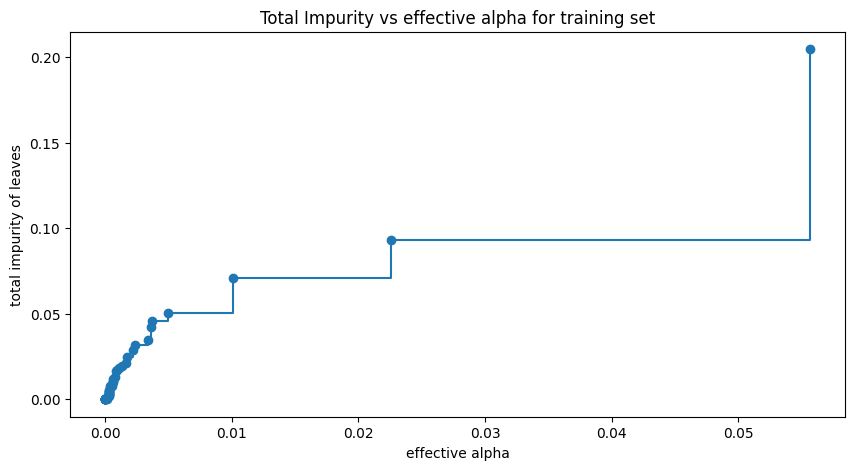

In [171]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [172]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953792759992322


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

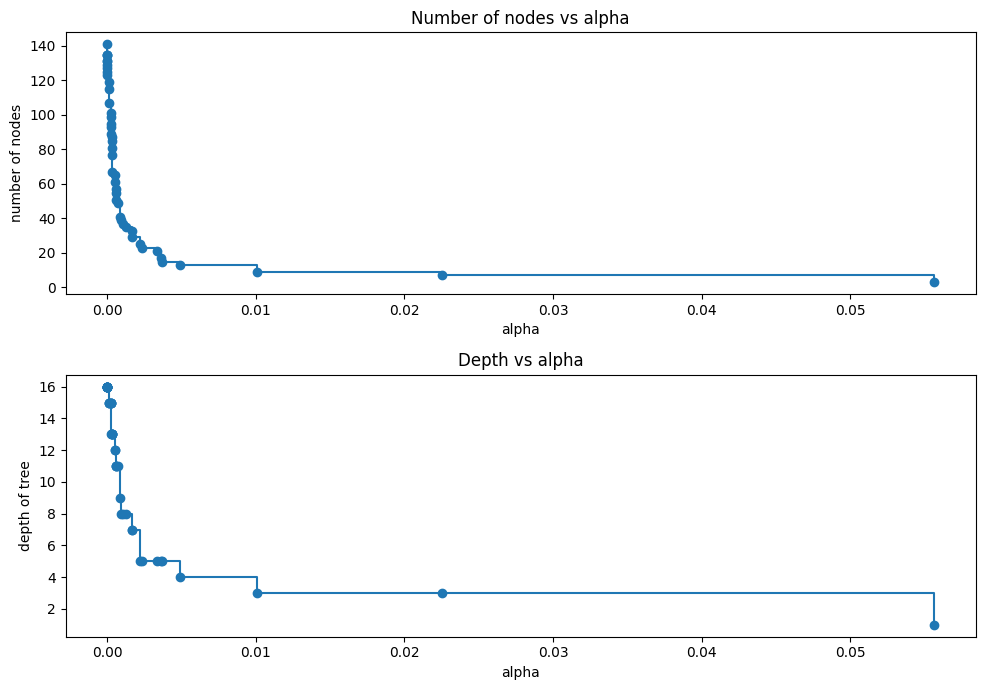

In [173]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [174]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [175]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [176]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

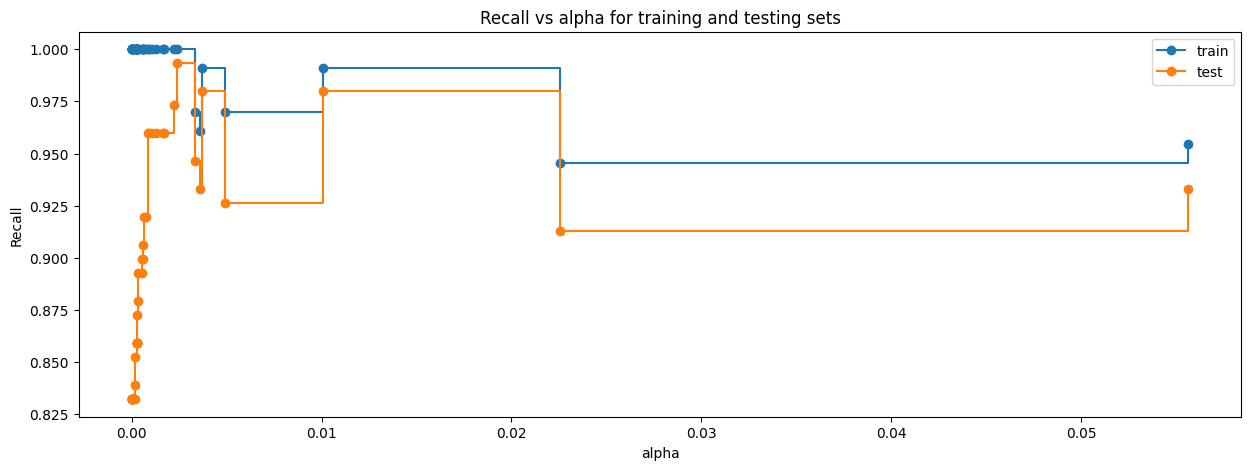

In [177]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [178]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0023758086197746484),
                       class_weight='balanced', random_state=1)


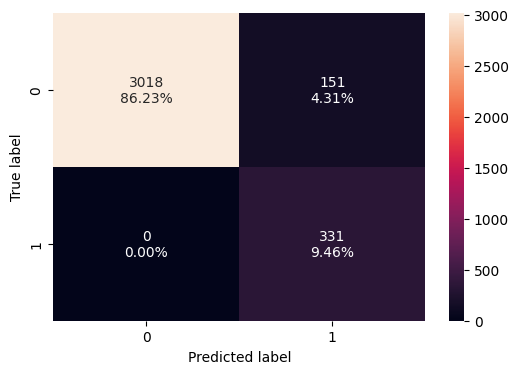

In [179]:
model4 = best_model
confusion_matrix_sklearn(model4, X_train, y_train)

In [180]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model4, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.956857,1.0,0.686722,0.814268


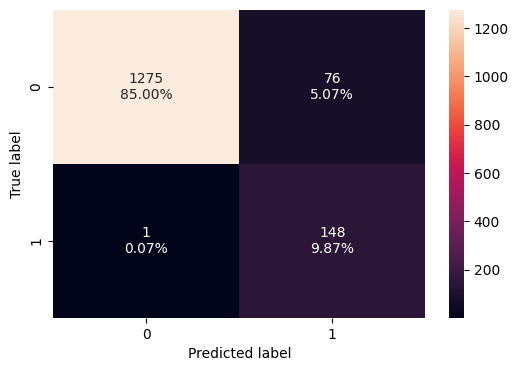

In [181]:
confusion_matrix_sklearn(model4, X_test, y_test)

In [182]:
decision_tree_post_test = model_performance_classification_sklearn(
    model4, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.948667,0.993289,0.660714,0.793566


#### **Observation**:
* In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 1 which shows that the model is able to generalize well on unseen data.

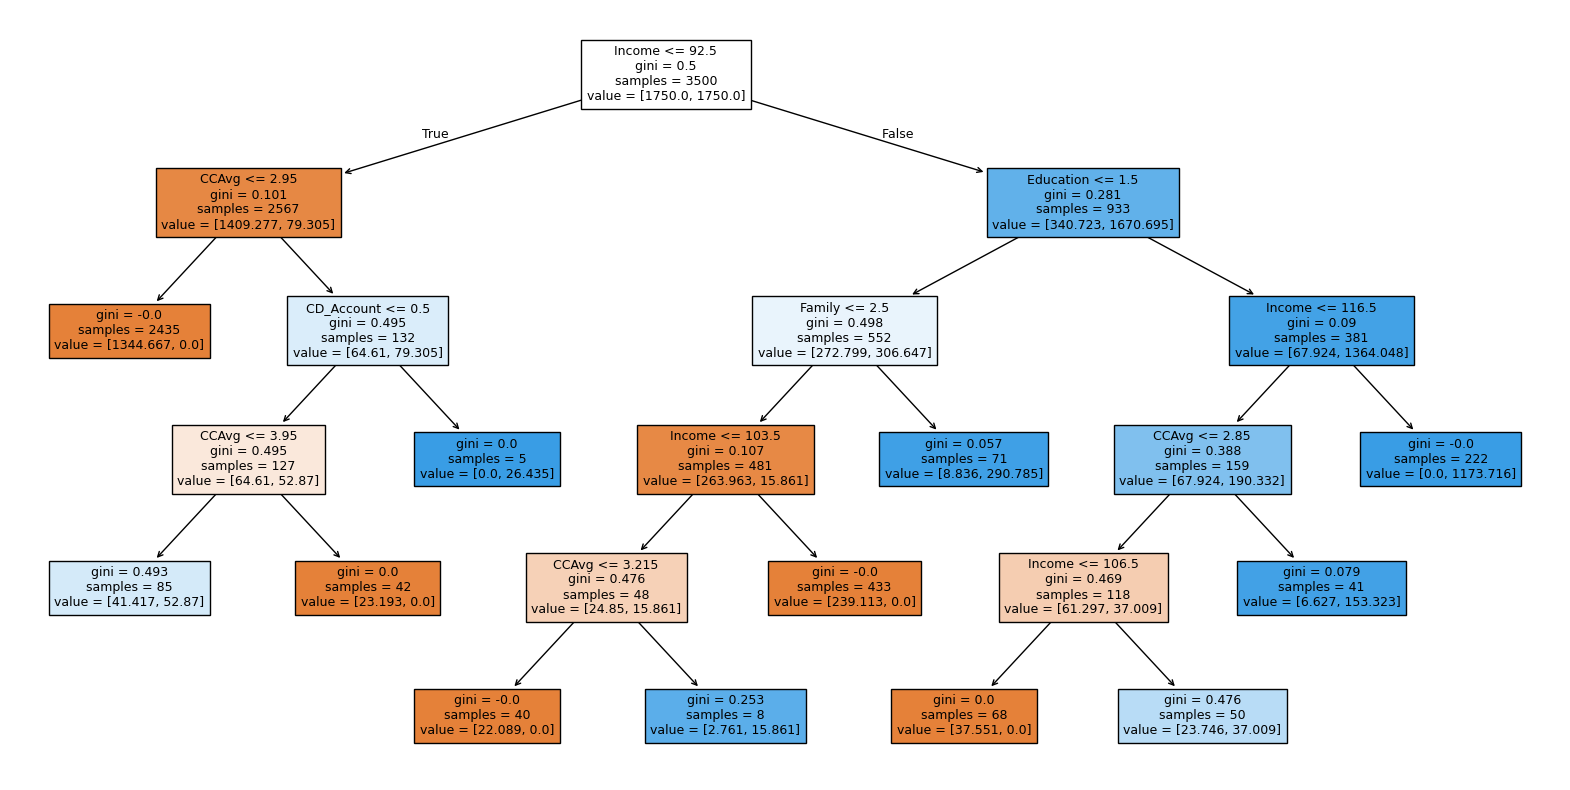

In [183]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [184]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model4, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [8.84, 290.79] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.85
|   |   |   |   |--- Income <= 106.50
|   |   |   |   | 

#### **Observation**:
The decision tree is drastically different in comparision with the pre-pruned version and has considered many features for classification.

In [185]:
importances = model4.feature_importances_
indices = np.argsort(importances)

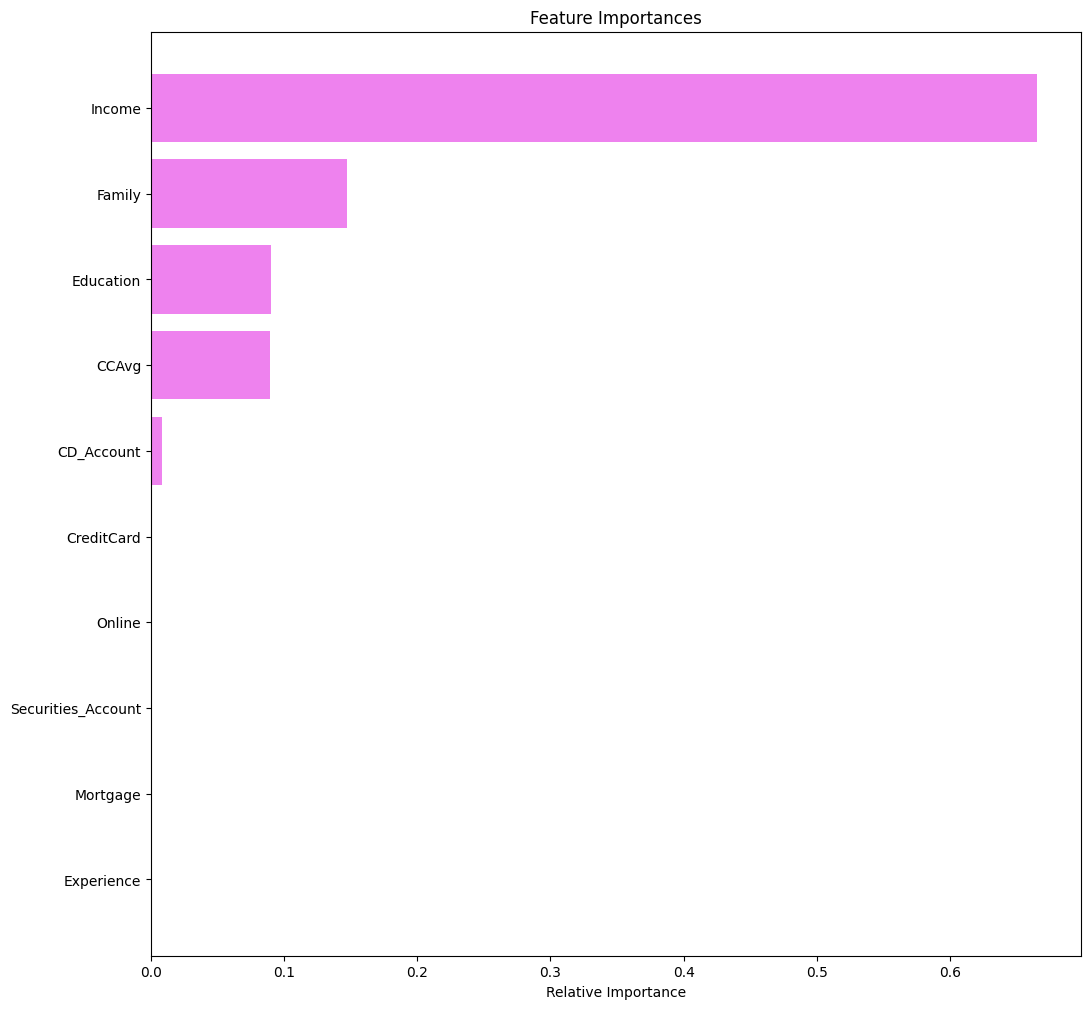

In [186]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### **Observation**:
*While income remains the primary driver, it is surprising to see family gaing second importance as the prepruned model did not consider family at all. Education, CCAvg have more weightage and CD_Account also have a say.

## Comparison of Models and Final Model Selection

In [187]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.790286,0.956857
Recall,1.0,1.0,1.000000,1.000000
Precision,1.0,1.0,0.310798,0.686722
F1,1.0,1.0,0.474212,0.814268


In [188]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.980000,0.972000,0.779333,0.948667
Recall,0.899329,0.832215,1.000000,0.993289
Precision,0.899329,0.879433,0.310417,0.660714
F1,0.899329,0.855172,0.473768,0.793566


####**Observation**:
Pre-Pruning model:

* Perfect recall (1.0)

* Very low precision (0.31) → many false positives.

* F1 score is low → imbalance between precision and recall.

Post-Pruning model:

* Very high recall (0.993)

* Better precision (0.66) and much better F1 (0.79)

* More practical for real-world use.

Since post pruning model is considering multiple features into account and does not compromise on precision and F! while highlighting recall, We **choose Post-pruning model.**

## **Conclusion and recommendation**:

 1.**Customer Base & Class Imbalance**
The dataset shows only about 9% of customers purchase personal loans.

This indicates a high class imbalance, making traditional accuracy metrics misleading.

Specific modeling strategies (like class weighting, pruning, etc.) were needed to effectively identify actual buyers.

2. **Modeling Approaches Evaluated**
You tested four decision tree variants:

Default Decision Tree

Decision Tree with Class Weights

Pre-Pruned Tree

Post-Pruned Tree

Each was evaluated using accuracy, recall, precision, and F1 score.

3. **Best Performing Model**
The Post-Pruned Decision Tree model achieved the best balance between recall and practical usability:

Recall: 0.993 (high buyer detection)

Precision: 0.66 (moderate false positives)

F1 Score: 0.79 (balanced performance)

It significantly reduces false positives compared to the Pre-Pruned model while keeping almost all true buyers.

4. **Feature Importance (based on Decision Tree splits)**
Key predictors of loan purchase:

Income (primary splitter): Higher income → higher likelihood to buy.

CCAvg (Credit Card Avg Spend): High spending → greater potential interest.

Education: More educated customers show a stronger tendency to purchase loans.


### **Recommendations**:

 1.**Target High-Income, High-Education Segments**

Prioritize marketing efforts toward customers with Income > 92.5K and Education level > 1.5.

These segments show very high loan uptake, making them low-risk, high-reward targets.

2. **Watch for Hidden Potential in Low-Income, High-Spending Segments**

Customers with lower income but high credit card spend (CCAvg > 2.95) show a moderate but valuable loan interest.

These might represent a credit-hungry but financially active segment, useful for personalized offers or cross-sell campaigns.

3. **Use Post-Pruned Model for Campaign Execution**

Deploy the post-pruned model in a pilot to select high-recall loan leads.

Expect some false positives, but very few actual buyers will be missed.

4. **Develop Personalized Messaging**
Use features like Income, Education, and CCAvg to tailor campaign messages:

E.g., “Premium loan offers for professionals” for educated high-income groups.

Or “Custom credit support based on your spending profile” for high-spend, low-income segments.

5. **Monitor and Adjust in Production**
Track campaign success rates vs. model predictions.

Continuously fine-tune pruning parameters or retrain with fresh data to improve precision over time without hurting recall.